# Traveling Salesman Problem [2]

The **Traveling Salesman Problem** is a classic optimization problem that involves finding the shortest possible route when traveling through cities and returning to the starting point, visiting each city exactly once (Taha, 2017). Behind its simplistic premise lies a multitude of real-life applications and ingenious solution strategies.
    
In this activity, I solved a simple Traveling Salesman Problem through the **Christofides Algorithm** within the ```networkx``` Python module.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

## Exploring the Dataset

### Node Positions

In [2]:
df_pos = pd.read_csv('TSP#2_pos.csv')

positions = dict()
for i in range(len(df_pos.columns)):
    positions[i] = (df_pos._get_value(0, i, takeable=True), df_pos._get_value(1, i, takeable=True))
positions

{0: (-3.08e-05, -1.87e-05),
 1: (-14.8058, -3.74e-05),
 2: (-45.6755, -9.7438),
 3: (-30.6703, -2.02336),
 4: (12.5209, -13.3649),
 5: (-46.3966, -9.17876),
 6: (-34.7018, 13.49),
 7: (-6.15704, 2.20589),
 8: (-8.02244, -1.3529),
 9: (-27.9627, -17.0577),
 10: (9.95119, -6.27887)}

### Edge Weights

In [3]:
df_dist = pd.read_csv('TSP#2_dist.csv')
df_dist

,0,1,2,3,4,5,6,7,8,9,10
0,0,8,50,31,12,48,36,2,5,39,10
1,8,0,38,9,33,37,22,6,4,14,32
2,50,38,0,11,55,1,23,46,41,17,52
3,31,9,11,0,44,13,16,19,25,18,42
4,12,33,55,44,0,54,53,30,28,45,7
5,48,37,1,13,54,0,26,47,40,24,51
6,36,22,23,16,53,26,0,29,35,34,49
7,2,6,46,19,30,47,29,0,3,27,15
8,5,4,41,25,28,40,35,3,0,20,21
9,39,14,17,18,45,24,34,27,20,0,43


In summary,
* There are 11 nodes
* Each node can go to any other node - an undirected graph
* Minimization is based on the weights provided, not on the metric distances

## Preliminary Network

In [4]:
n = 11
G = nx.complete_graph(n)

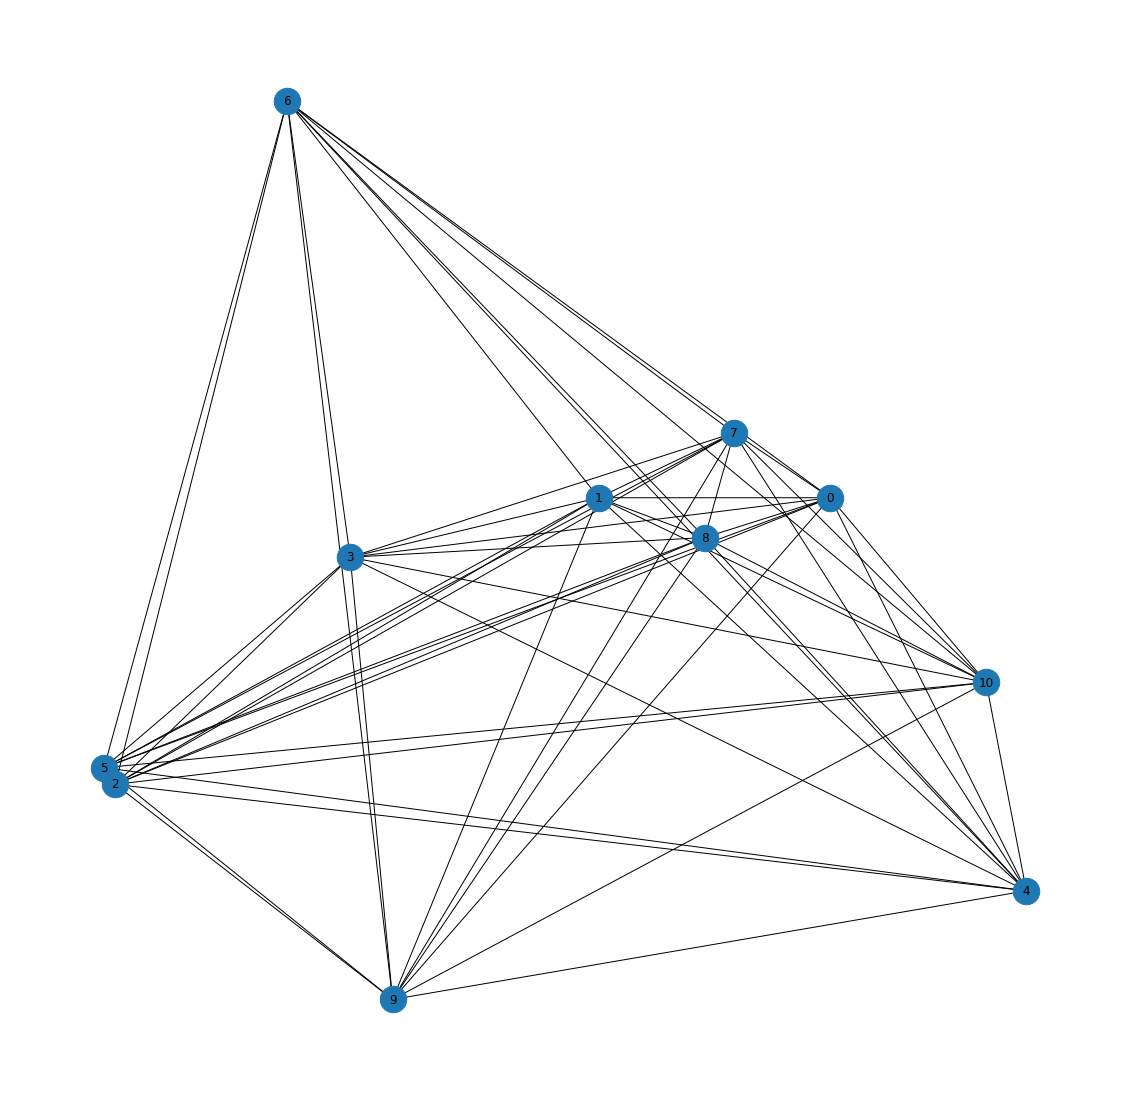

In [5]:
fig_1, axs_1 = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
nx.draw(G, pos=positions, ax=axs_1)
nx.draw_networkx_labels(G, pos=positions)
nx.draw_networkx_nodes(G, pos=positions, node_size=700)

In [6]:
for i, j in G.edges:
    G.edges[i, j]['weight'] = df_dist._get_value(i, j, takeable=True)
G.edges.data()

EdgeDataView([(0, 1, {'weight': 8}), (0, 2, {'weight': 50}), (0, 3, {'weight': 31}), (0, 4, {'weight': 12}), (0, 5, {'weight': 48}), (0, 6, {'weight': 36}), (0, 7, {'weight': 2}), (0, 8, {'weight': 5}), (0, 9, {'weight': 39}), (0, 10, {'weight': 10}), (1, 2, {'weight': 38}), (1, 3, {'weight': 9}), (1, 4, {'weight': 33}), (1, 5, {'weight': 37}), (1, 6, {'weight': 22}), (1, 7, {'weight': 6}), (1, 8, {'weight': 4}), (1, 9, {'weight': 14}), (1, 10, {'weight': 32}), (2, 3, {'weight': 11}), (2, 4, {'weight': 55}), (2, 5, {'weight': 1}), (2, 6, {'weight': 23}), (2, 7, {'weight': 46}), (2, 8, {'weight': 41}), (2, 9, {'weight': 17}), (2, 10, {'weight': 52}), (3, 4, {'weight': 44}), (3, 5, {'weight': 13}), (3, 6, {'weight': 16}), (3, 7, {'weight': 19}), (3, 8, {'weight': 25}), (3, 9, {'weight': 18}), (3, 10, {'weight': 42}), (4, 5, {'weight': 54}), (4, 6, {'weight': 53}), (4, 7, {'weight': 30}), (4, 8, {'weight': 28}), (4, 9, {'weight': 45}), (4, 10, {'weight': 7}), (5, 6, {'weight': 26}), (5, 7

## Christofides Algorithm

**Christofides Algorithm** is a heuristic algorithm that produces an approximate solution that is 1.5 times the optimal. The technique computes a shortest spanning tree of the original graph G and finds a minimal cost perfect matching of a certain induced subgraph of G. To further visualize, the following shows the specific steps:

### 1. Identify the Minimum Spanning Tree

A **minimum spanning tree** is a subgraph that connects each nodes without any loops and with the minimum total edge weight. 

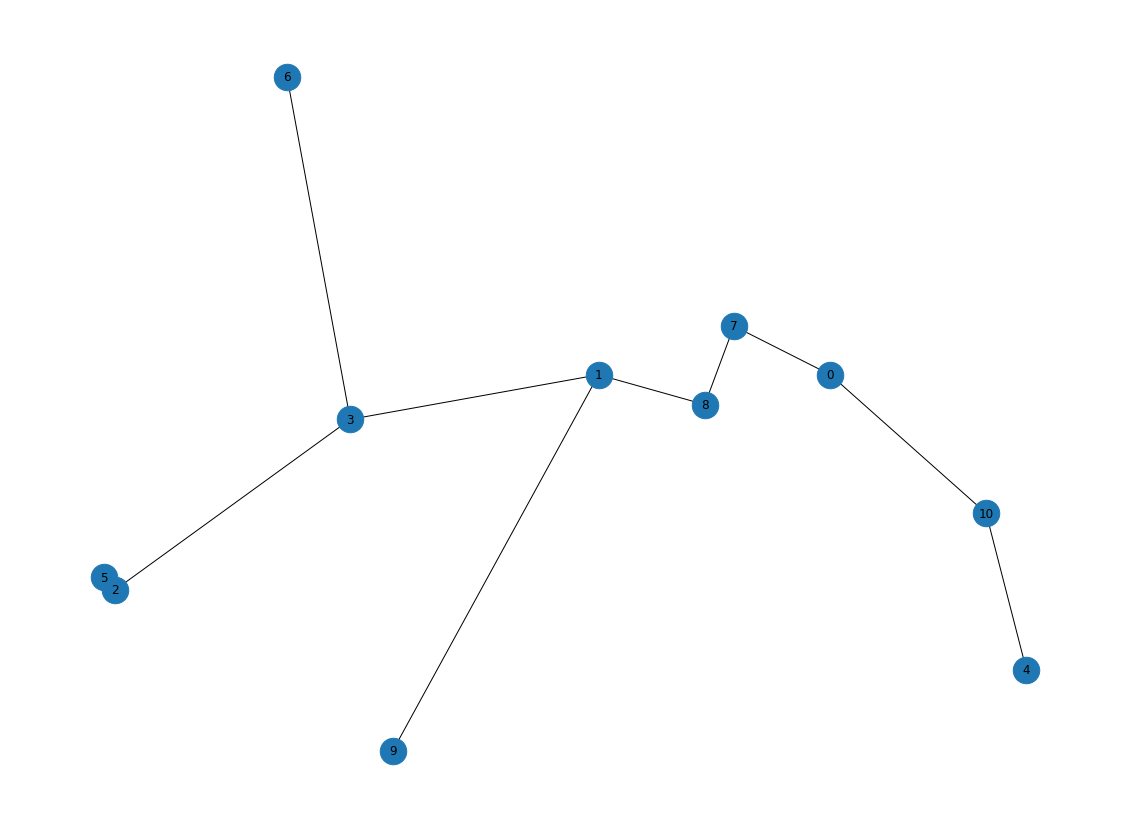

In [7]:
tree = nx.minimum_spanning_tree(G, weight='weight')

fig_2, axs_2 = plt.subplots(nrows=1, ncols=1, figsize=(20,15))
nx.draw(tree, pos=positions, ax=axs_2)
nx.draw_networkx_labels(tree, pos=positions)
nx.draw_networkx_nodes(tree, pos=positions, node_size=700)

### 2. Take Note of the Handshaking Lemma

An interesting concept in this algorithm focuses on determining the nodes that touches an **odd** number of edges. In graph theory, the **Handshaking Lemma** states that there is an even number of nodes which statisfy the criterion.

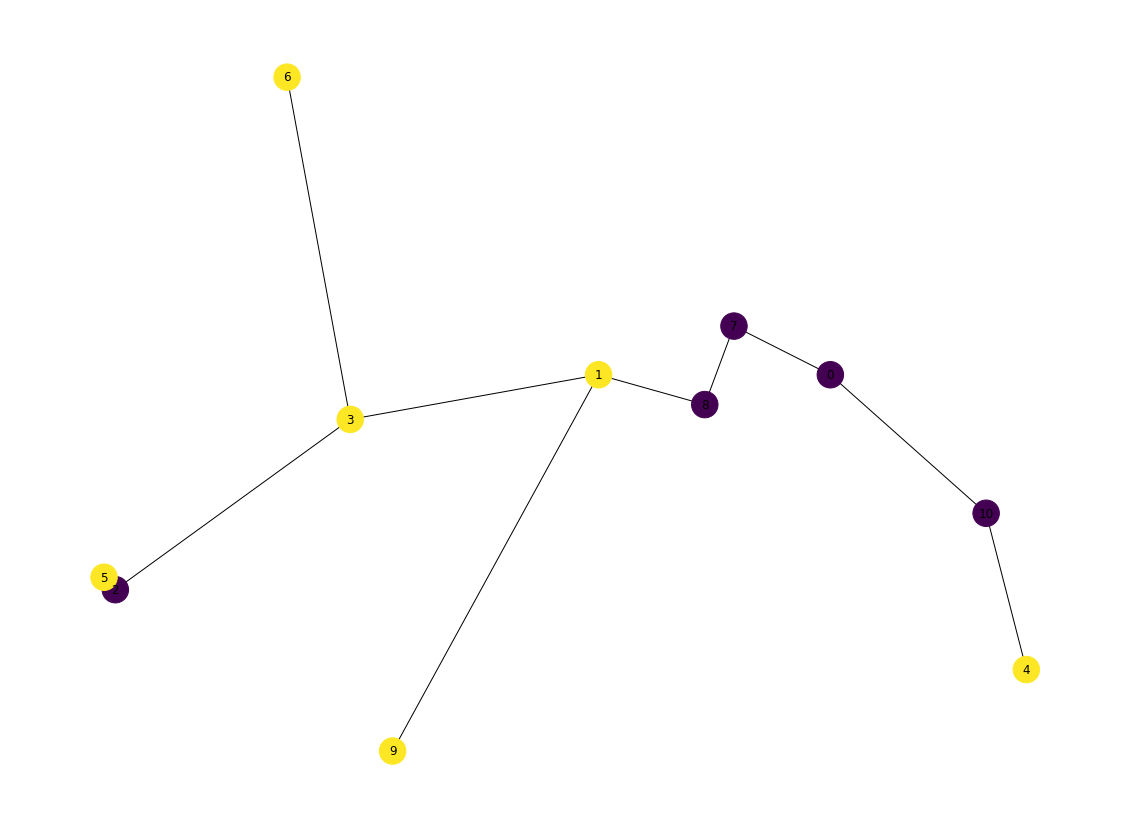

In [8]:
odds = [i for i in tree.nodes if tree.degree(i) % 2 == 1] 

fig_3, axs_3 = plt.subplots(nrows=1, ncols=1, figsize=(20,15))
nx.draw(tree, pos=positions, ax=axs_3)
nx.draw_networkx_labels(tree, pos=positions)
nx.draw_networkx_nodes(tree, pos=positions, node_size=700, node_color=[tree.degree(i) % 2 == 1 for i in tree.nodes])

### 3. Conduct a Minimum Weight Perfect Matching

Next, by only using the selected nodes, a specified matching was conducted to perfectly match pairs that minimize the total weight. This is shown below:

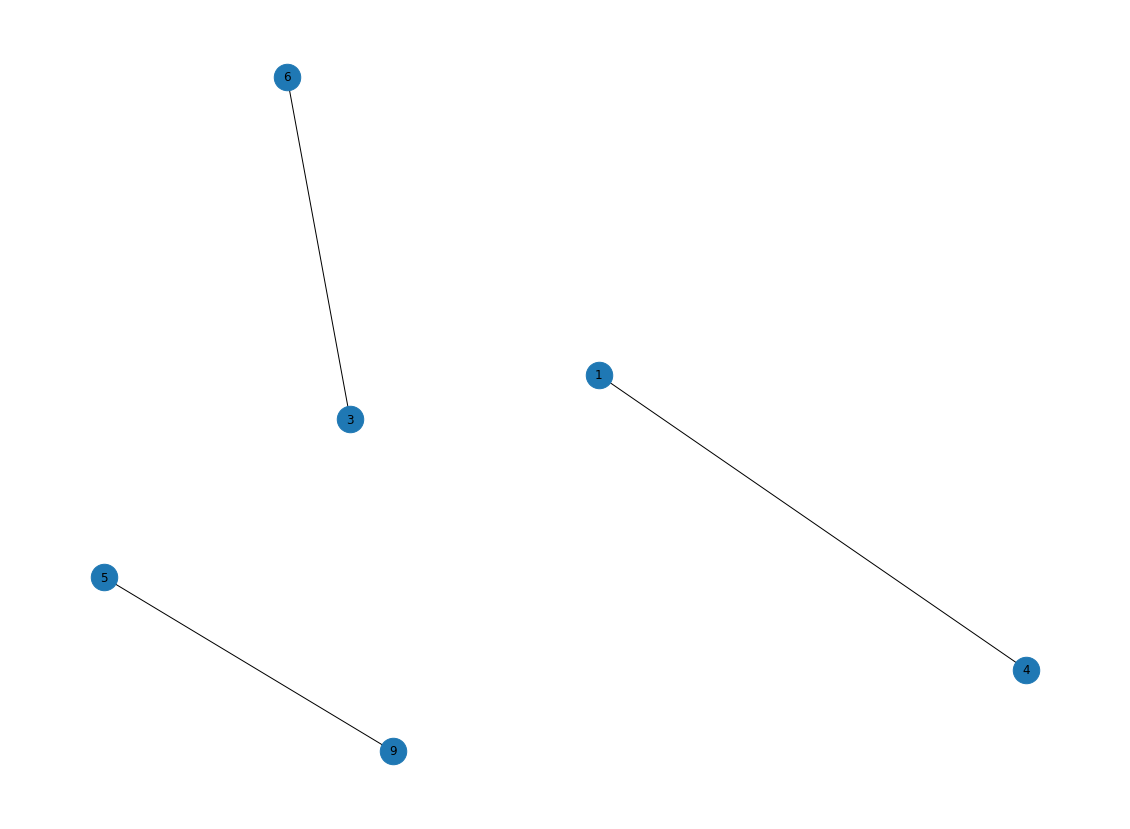

In [9]:
matching = nx.min_weight_matching(G.subgraph(odds), weight='weight')

fig_4, axs_4 = plt.subplots(nrows=1, ncols=1, figsize=(20,15))
nx.draw(G.edge_subgraph(matching), pos=positions, ax=axs_4)
nx.draw_networkx_labels(G.edge_subgraph(matching), pos=positions)
nx.draw_networkx_nodes(G.edge_subgraph(matching), pos=positions, node_size=700)

### 4. Combine the Edges from the Minimum Spanning Tree and the Minimum Weight Perfect Matching

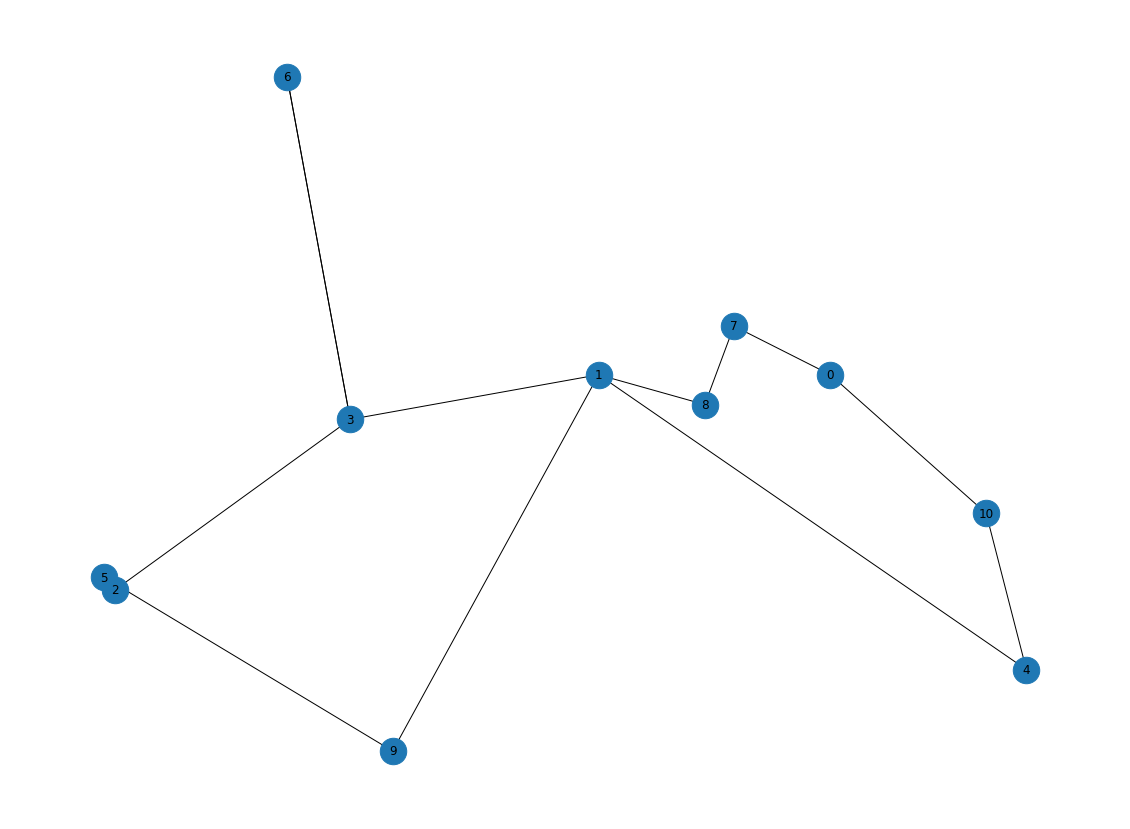

In [10]:
M = nx.MultiGraph()

fig_4, axs_4 = plt.subplots(nrows=1, ncols=1, figsize=(20,15))
M.add_nodes_from([i for i in positions])
M.add_edges_from(tree.edges)
M.add_edges_from(matching)

nx.draw_networkx_labels(tree, pos=positions)
nx.draw_networkx_nodes(tree, pos=positions, node_size=700)

nx.draw(M, pos=positions, ax=axs_4)

### 5. Identify the Eulerian Circuit and Form a Hamiltonian Circuit

An **Eulerian Circuit** is a technical term that describes a path visiting each **edge** exactly once, and starts and ends with the origin. It is highly noted that the degrees of each node is an even number.

To further optimize the routing, **shortcutting** is implemented which creates a subgraph that avoids entering the same node twice. This, in turn, is coined as the **Hamiltonian Circuit**, from the Eulerian Circuit.

#### a. Eulerian

In [11]:
initial_route = list(nx.eulerian_circuit(M, source=0))
print(initial_route)

[(0, 10), (10, 4), (4, 1), (1, 9), (9, 5), (5, 2), (2, 3), (3, 6), (6, 3), (3, 1), (1, 8), (8, 7), (7, 0)]


#### b. Hamiltonian

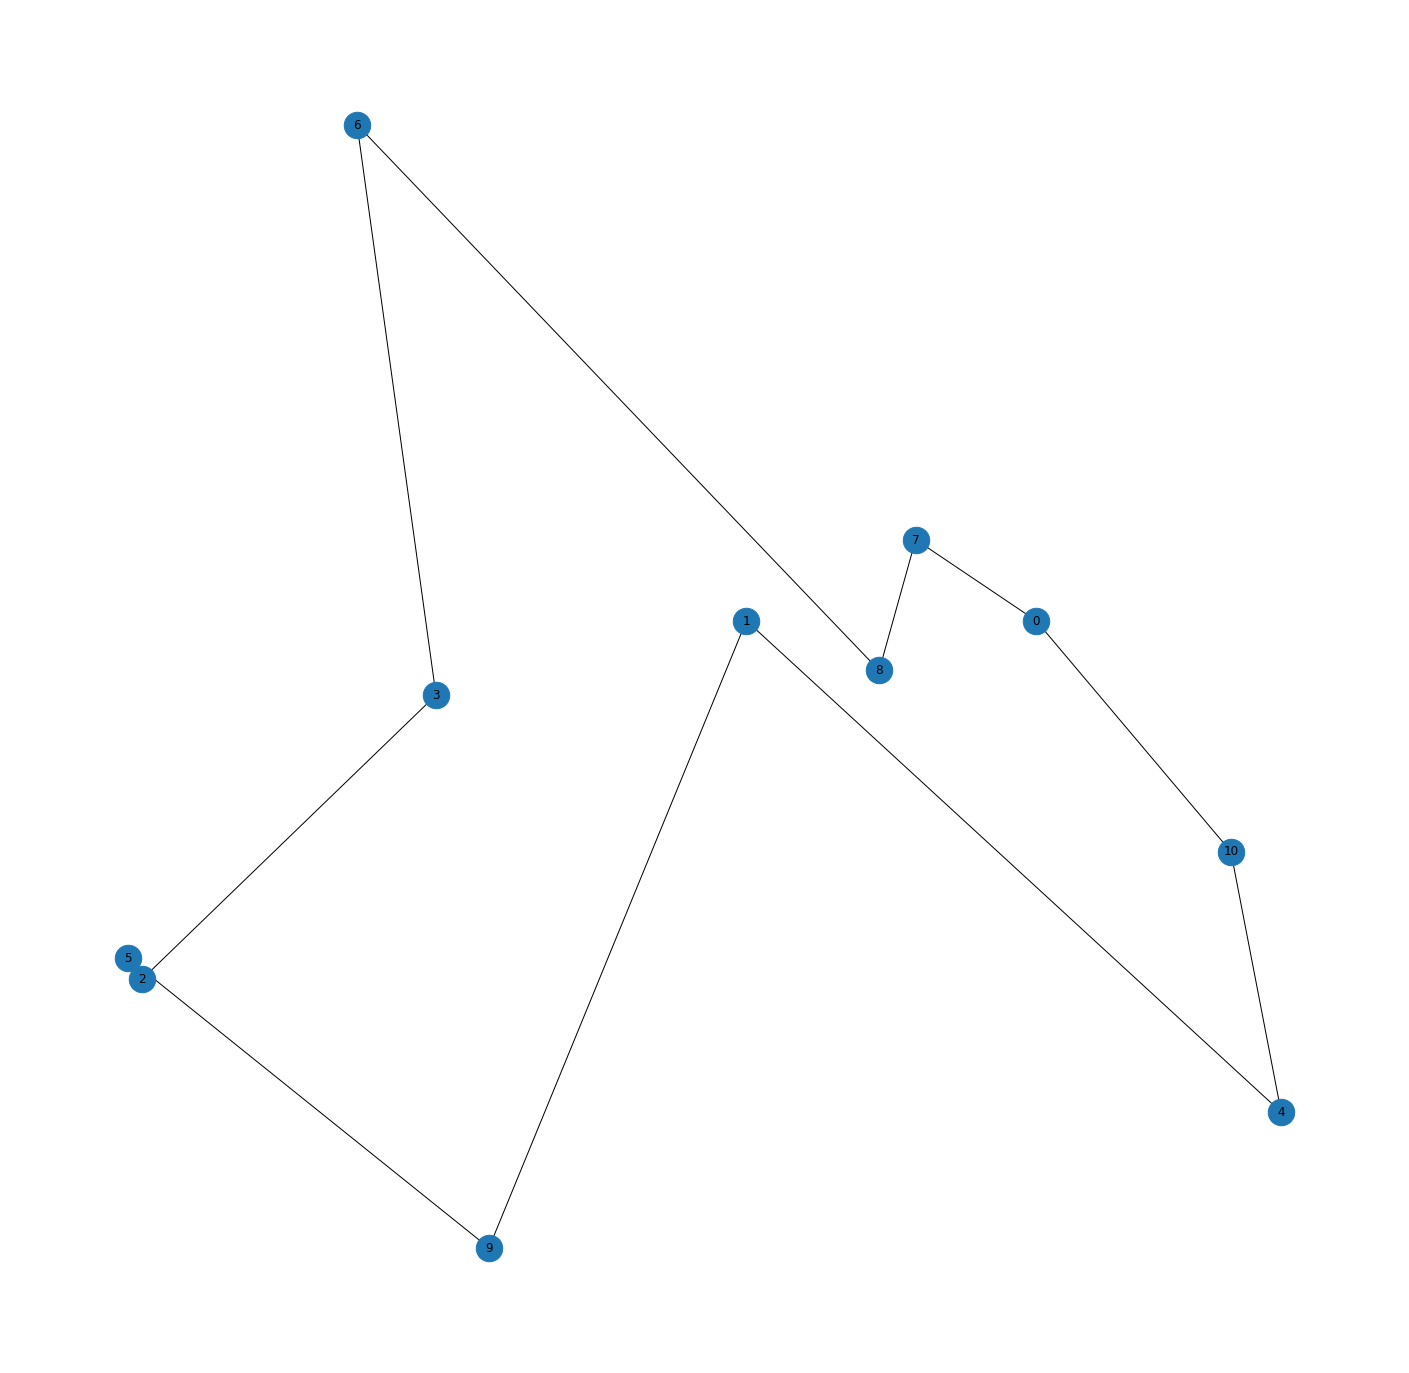

In [12]:
route = [0]
for (i, j) in initial_route:
    if j not in route:
        route.append(j)

fig_5, axs_5 = plt.subplots(nrows=1, ncols=1, figsize=(25,25))
route_edges = [(route[i-1] ,route[i]) for i in positions]
nx.draw(G.edge_subgraph(route_edges), pos=positions, ax=axs_5)
nx.draw_networkx_labels(tree, pos=positions)
nx.draw_networkx_nodes(tree, pos=positions, node_size=700)

## Results

In [13]:
print('Node Sequence:', route)

Node Sequence: [0, 10, 4, 1, 9, 5, 2, 3, 6, 8, 7]


In [14]:
print('Edges:', route_edges)

Edges: [(7, 0), (0, 10), (10, 4), (4, 1), (1, 9), (9, 5), (5, 2), (2, 3), (3, 6), (6, 8), (8, 7)]


In [15]:
cost = 0
for (i, j) in route_edges:
    cost += G.edges[i, j]['weight']
print('Cost:', cost)

Cost: 156
